###  ****** I tried working on the bigrams and trigrams using mrjobs but got stuck with some issues. So, I have done the problems using Natural Language Toolkit(Nltk).

###  I have referred to the link for MRJob https://pythonhosted.org/mrjob/guides/writing-mrjobs.html

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjob as mr


### Homework 5

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. Extension of homework to to implement an TD-IDF algorithm  (see below)

Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

##Homework 5.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [21]:
%%file bigramCount.py
from mrjob.job import MRJob
from operator import itemgetter
import re
from ast import literal_eval


WORD_RE = re.compile(r"[\w']+")  ## This regular expression matches the one or more word characters in the line
#data=[]

class MRWordBigramCount(MRJob):
    def mapper(self, _, line):
        lastword=""
        for word in WORD_RE.findall(line):
            if lastword != "" and word != "":
                yield(lastword.lower(),word.lower()),1
            lastword = word
        
    def combiner(self,bigram,counts):
        yield bigram, sum(counts)    ## combiner takes each bigram and sums up all the counts(i.e number of times the bigram occurs)
    def reducer(self, bigram,counts):
        yield (bigram, sum(counts))
   
      # while(bigram!=""):
      #      sums = sum(counts)
       #     dt1 = tuple(bigram)+(sums,)
        #    data.append((dt1))
           # print data
            
        #sortedData = sorted(data,key=itemgetter(2))
       # yield None, sortedData
        
if __name__=='__main__':MRWordBigramCount.run()

Overwriting bigramCount.py


### Note : In the mapper method we are going to run a loop over all the words in the line. Intially in the first run of the "for" loop, variable "lastword" is an empty string so it is not going to enter into the if statement. After if statement, "lastword" holds the first word in the line in the line and "word"  holds the second word in the line and each time a tuple is formed a count of 1 is added to it. The same process runs for all the other words in the line

In [22]:
! python bigramCount.py ./.mrjob.conf data/test.txt

["a", "firmament"]	1
["above", "the"]	1
["after", "his"]	1
["and", "darkness"]	1
["and", "divided"]	1
["and", "god"]	11
["and", "it"]	3
["and", "let"]	2
["and", "the"]	10
["and", "there"]	1
["and", "void"]	1
["appear", "and"]	1
["authorized", "king"]	1
["be", "a"]	1
["be", "gathered"]	1
["be", "light"]	1
["beginning", "god"]	1
["bible", "authorized"]	1
["bring", "forth"]	1
["called", "he"]	1
["called", "night"]	1
["called", "the"]	3
["created", "the"]	1
["darkness", "he"]	1
["darkness", "was"]	1
["day", "and"]	1
["deep", "and"]	1
["divide", "the"]	1
["divided", "the"]	2
["dry", "land"]	2
["earth", "and"]	2
["earth", "bring"]	1
["earth", "was"]	1
["evening", "and"]	2
["face", "of"]	2
["firmament", "and"]	2
["firmament", "from"]	1
["firmament", "heaven"]	1
["firmament", "in"]	1
["first", "day"]	1
["form", "and"]	1
["forth", "grass"]	1
["from", "the"]	3
["fruit", "after"]	1
["fruit", "tree"]	1
["gathered", "together"]	1
["gathering", "together"]	1
["god", "called"]	3
["god", "created"]	1


No configs found; falling back on auto-configuration
Creating temp directory c:\users\nikitha\appdata\local\temp\bigramCount.Nikitha.20171022.151601.356000
Running step 1 of 1...
Streaming final output from c:\users\nikitha\appdata\local\temp\bigramCount.Nikitha.20171022.151601.356000\output...
Removing temp directory c:\users\nikitha\appdata\local\temp\bigramCount.Nikitha.20171022.151601.356000...


## Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [29]:
import nltk
#print nltk.__version__

f = open('data/test.txt')
raw = f.read()
tokens = nltk.word_tokenize(raw) # Tokenize breaks the text into words,phrases, symbols called tokens
bgs = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
#print fdist.items()  ## 
#fdist.items() gives all the bigrams with their frequency distribution.
for k,v in sorted(fdist.items(),key=lambda t:t[-1], reverse =True)[:10]:
    print (k,v)

3.2.3
(('and', 'god'), 11)
(('and', 'the'), 10)
(('the', 'waters'), 8)
(('it', 'was'), 5)
(('the', 'firmament'), 4)
(('of', 'the'), 4)
(('god', 'said'), 4)
(('the', 'earth'), 4)
(('said', 'let'), 4)
(('earth', 'and'), 3)


### Reference : https://code.tutsplus.com/tutorials/introducing-the-natural-language-toolkit-nltk--cms-28620

## Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [48]:
%%file bigramCount.py
from mrjob.job import MRJob
from operator import itemgetter
import re
from ast import literal_eval

WORD_RE = re.compile(r"[\w']+")
data=[]

class MRWordBigramCount(MRJob):
    def mapper(self, _, line):
        lastword=""
        prevword=""
        for word in WORD_RE.findall(line):
            if prevword!="" and lastword != "" and word != "":
                yield(prevword.lower(),lastword.lower(),word.lower()),1
            if lastword != word:    
                lastword = word
                prevword = lastword
    def combiner(self,trigram,counts):
        yield trigram, sum(counts)
    def reducer(self, trigram,counts):
        yield trigram, sum(counts)
        
if __name__=='__main__':MRWordBigramCount.run()

Overwriting bigramCount.py


In [49]:
! python bigramCount.py ./.mrjob.conf data/test.txt

["a", "a", "firmament"]	1
["above", "above", "the"]	1
["after", "after", "his"]	1
["and", "and", "darkness"]	1
["and", "and", "divided"]	1
["and", "and", "god"]	11
["and", "and", "it"]	3
["and", "and", "let"]	2
["and", "and", "the"]	10
["and", "and", "there"]	1
["and", "and", "void"]	1
["appear", "appear", "and"]	1
["authorized", "authorized", "king"]	1
["be", "be", "a"]	1
["be", "be", "gathered"]	1
["be", "be", "light"]	1
["beginning", "beginning", "god"]	1
["bible", "bible", "authorized"]	1
["bring", "bring", "forth"]	1
["called", "called", "he"]	1
["called", "called", "night"]	1
["called", "called", "the"]	3
["created", "created", "the"]	1
["darkness", "darkness", "he"]	1
["darkness", "darkness", "was"]	1
["day", "day", "and"]	1
["deep", "deep", "and"]	1
["divide", "divide", "the"]	1
["divided", "divided", "the"]	2
["dry", "dry", "land"]	2
["earth", "earth", "and"]	2
["earth", "earth", "bring"]	1
["earth", "earth", "was"]	1
["evening", "evening", "and"]	2
["face", "face", "of"]	2
["

No configs found; falling back on auto-configuration
Creating temp directory c:\users\nikitha\appdata\local\temp\bigramCount.Nikitha.20171022.155854.255000
Running step 1 of 1...
Streaming final output from c:\users\nikitha\appdata\local\temp\bigramCount.Nikitha.20171022.155854.255000\output...
Removing temp directory c:\users\nikitha\appdata\local\temp\bigramCount.Nikitha.20171022.155854.255000...


## Using Nltk 

In [51]:
import nltk

f = open('data/test.txt')
raw = f.read()
#creates the tokens
tokens = nltk.word_tokenize(raw)

#By specifying the number of tokens we create trigrams
trigrams = ngrams(token,3)
 
unordered_trigrams = [tuple(sorted(n)) for n in list(nltk.trigrams(raw.split()))]
fdist=nltk.FreqDist(unordered_trigrams)
for k,v in sorted(fdist.items(), key=lambda t:t[-1], reverse=True)[:10]: # Retriveing the first 10 trigrams
    print(k,v)    

(('and', 'evening', 'the'), 6)
(('and', 'earth', 'the'), 6)
(('from', 'the', 'waters'), 4)
(('morning', 'the', 'were'), 4)
(('face', 'of', 'the'), 4)
(('and', 'god', 'said'), 4)
(('god', 'let', 'said'), 4)
(('and', 'called', 'god'), 3)
(('it', 'so', 'was'), 3)
(('and', 'the', 'waters'), 3)


## Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

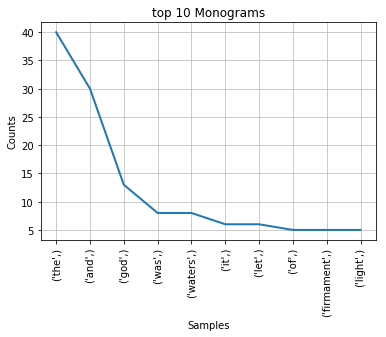

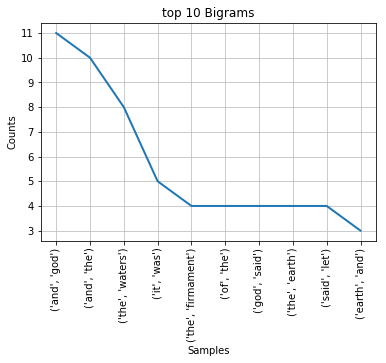

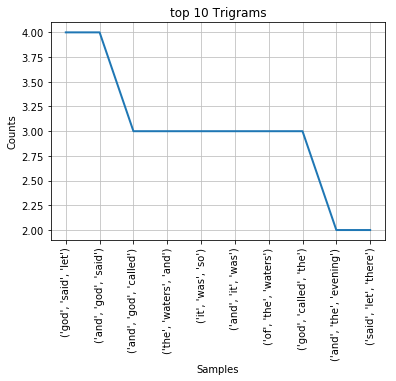

In [37]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt

text = open('data/test.txt') 
text = text.read()
token = nltk.word_tokenize(text)
monogram = ngrams(token,1) # Tokenizes the text with 2 words as a pair called monograms
#print monogram
bigrams = ngrams(token,2) # Tokenizes the text with 2 words as a pair called bigrams
trigrams = ngrams(token,3) # Tokenizes the text with 2 words as a pair called trigrams
#as shown above creates frequnecy distribution of 
fdist = nltk.FreqDist(monogram)
# print fdist.items()
fdist1 = nltk.FreqDist(bigrams)
fdist2 = nltk.FreqDist(trigrams)
plt.title("top 10 Monograms")
fdist.plot(10,cumulative=False)
plt.title("top 10 Bigrams")
fdist1.plot(10,cumulative=False)
plt.title("top 10 Trigrams")
fdist2.plot(10,cumulative=False)

## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books

